2024-04-13 14:21:55.572274: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: fl

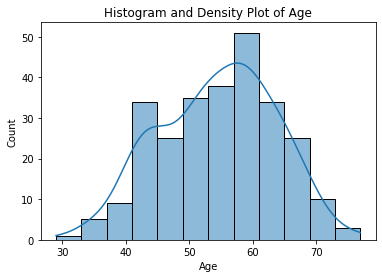

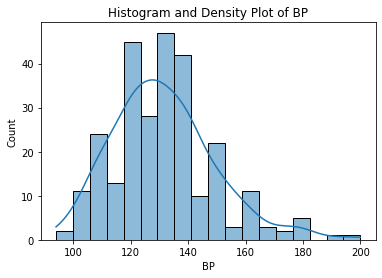

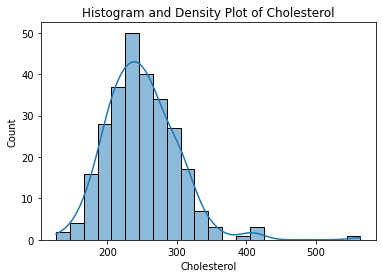

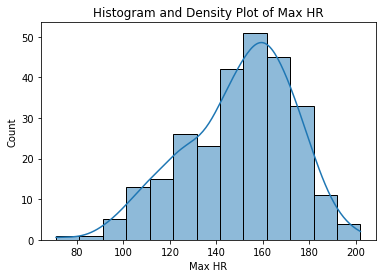

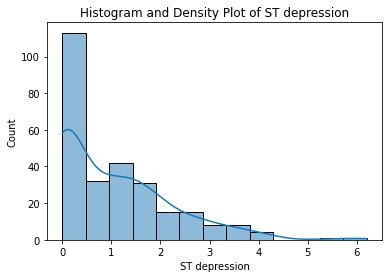

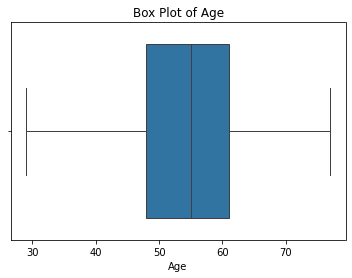

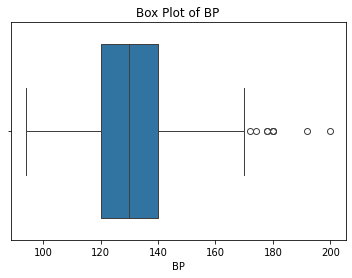

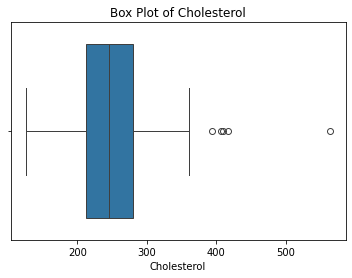

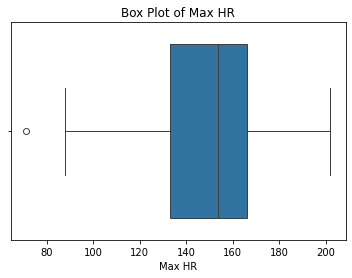

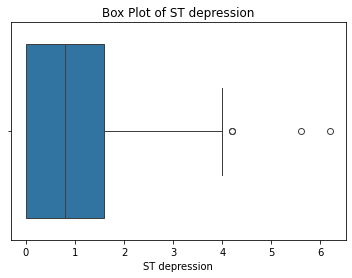

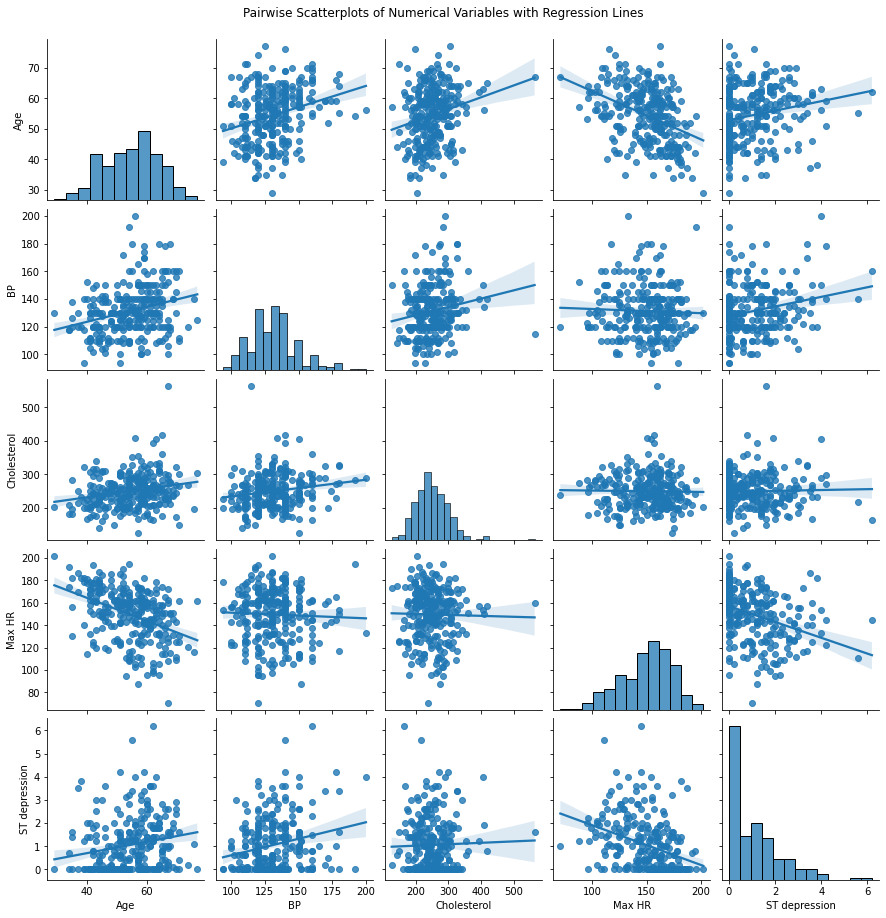

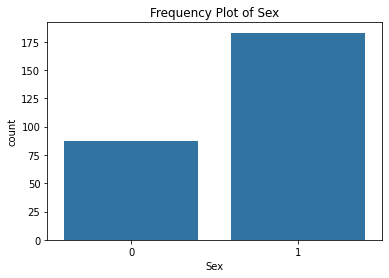

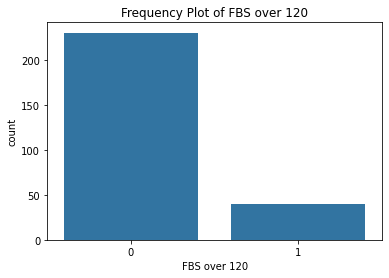

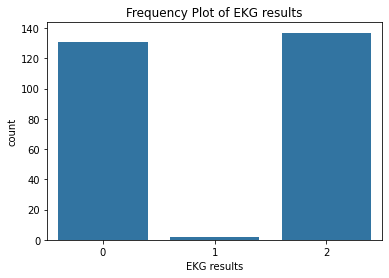

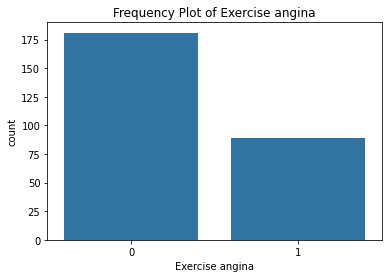

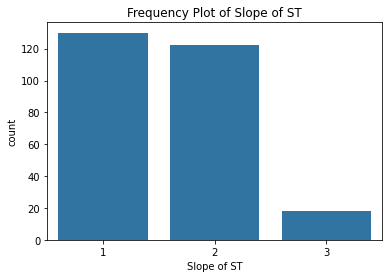

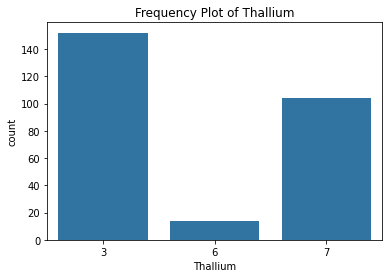

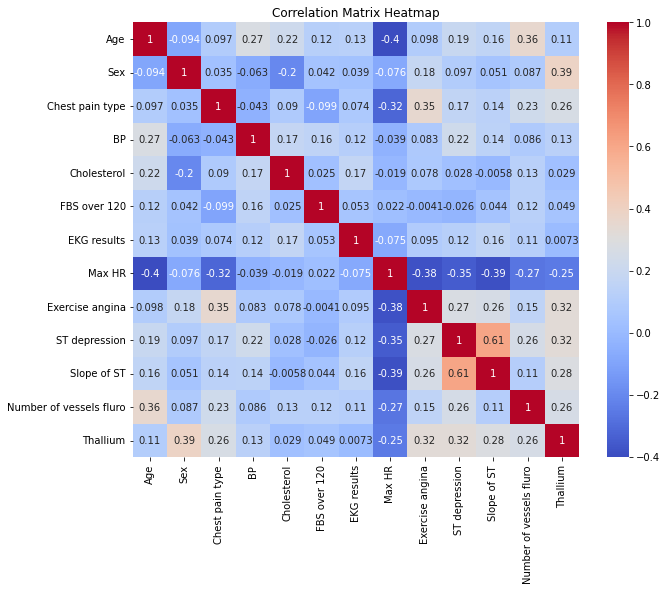

In [3]:
from dataloader import load_dataset, compare_features_binary
from tensorflow.keras.optimizers import Adam


dataset_path = 'Heart_Disease_Prediction.csv'
df = load_dataset(dataset_path)

print("Dataset Information:")
print(df.info())

compare_features_binary(df)


Random Forest Accuracy: 0.803921568627451
Random Forest ROC AUC: 0.9020376175548589


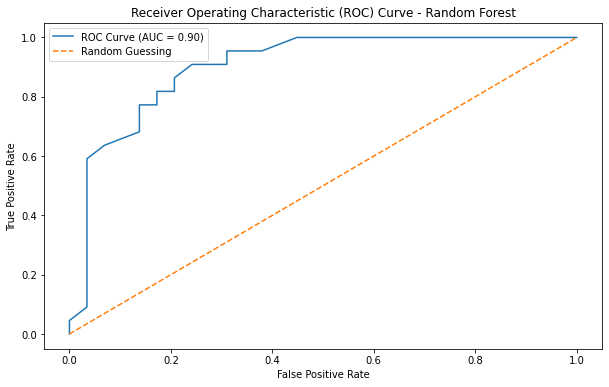

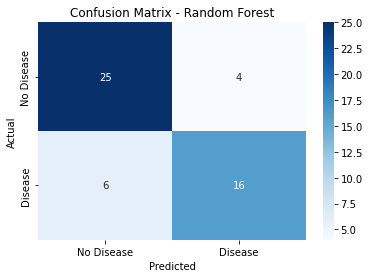

In [69]:
from dataloader import process_data, random_forest_model

# Process the data for modeling
X_train, X_test, y_train, y_test = process_data(df)

# Create and evaluate the Random Forest model
random_forest_model(X_train, X_test, y_train, y_test)


In [13]:
# Define a list of example binary classification datasets
binary_classification_datasets = ["dataset1", "dataset2", "dataset3"]


In [20]:
# Load the dataset (using a placeholder dataset)
d1 = {"Training": X_train, "Target": y_train}

# Assuming d1 has 'Training' and 'Target' keys
X = d1["Training"]
y = d1["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the model architecture
model = Sequential([
    Dense(12, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


X_train shape: (81, 13)
y_train shape: (81,)
X_test shape: (21, 13)
y_test shape: (21,)


In [28]:
#The model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 12)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4384 - loss: 0.7271 - val_accuracy: 0.7143 - val_loss: 0.6935
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5604 - loss: 0.7018 - val_accuracy: 0.6667 - val_loss: 0.6872
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5876 - loss: 0.6836 - val_accuracy: 0.6667 - val_loss: 0.6833
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5506 - loss: 0.6836 - val_accuracy: 0.6667 - val_loss: 0.6808
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6353 - loss: 0.6721 - val_accuracy: 0.6667 - val_loss: 0.6783
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6603 - loss: 0.6686 - val_accuracy: 0.6667 - val_loss: 0.6778
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6570 - loss: 0.6668 - val_accuracy: 0.6667 - val_loss: 0.6773
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7266 - loss: 0.6487 - val_accuracy: 0.6190 - val_loss: 0.6746

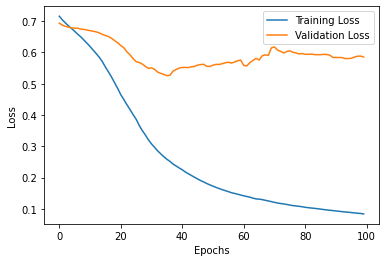

In [30]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

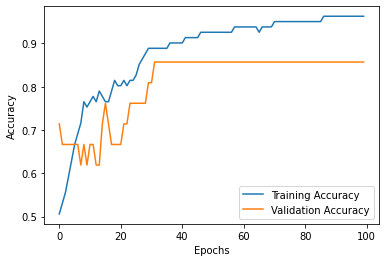

In [31]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8571 - loss: 0.5856
Test Loss: 0.5855538249015808
Test Accuracy: 0.8571428656578064


In [33]:
# Make predictions on the test data
predictions = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


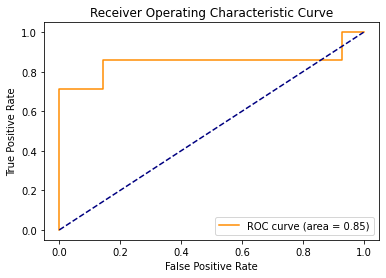

In [34]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [44]:
#Model 2: 

#Increasing neurons in hidden layers that helps with increasing learning capacity, reduce underfitting 
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4258 - loss: 0.6871 - val_accuracy: 0.5238 - val_loss: 0.6817
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 0.6747 - val_accuracy: 0.7143 - val_loss: 0.6744
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6928 - loss: 0.6678 - val_accuracy: 0.8095 - val_loss: 0.6673
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7277 - loss: 0.6645 - val_accuracy: 0.8095 - val_loss: 0.6630
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7871 - loss: 0.6572 - val_accuracy: 0.8095 - val_loss: 0.6585
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7649 - loss: 0.6490 - val_accuracy: 0.9048 - val_loss: 0.6514
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8052 - loss: 0.6504 - val_accuracy: 0.9524 - val_loss: 0.6420
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8048 - loss: 0.6348 - val_accuracy: 0.9524 - val_loss: 0.6322

In [45]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.38636666536331177
Test Accuracy: 0.8571428656578064


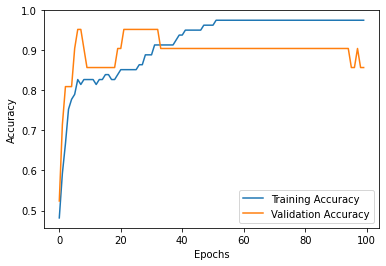

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

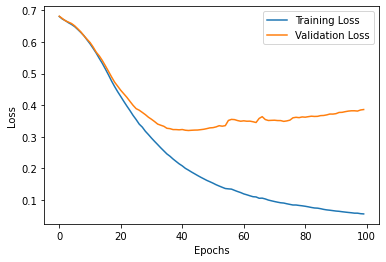

In [48]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
#Model 3:

#Increasing neurons in hidden layers that helps with increasing learning capacity, reduce underfitting 
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model with more epochs
history = model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5098 - loss: 0.6798 - val_accuracy: 0.7619 - val_loss: 0.6196
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6966 - loss: 0.6250 - val_accuracy: 0.7619 - val_loss: 0.6061
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6733 - loss: 0.6304 - val_accuracy: 0.8095 - val_loss: 0.5975
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7442 - loss: 0.6083 - val_accuracy: 0.7619 - val_loss: 0.5884
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7152 - loss: 0.6169 - val_accuracy: 0.8571 - val_loss: 0.5806
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7671 - loss: 0.5859 - val_accuracy: 0.8571 - val_loss: 0.5678
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.5811 - val_accuracy: 0.8095 - val_loss: 0.5527
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.5692 - val_accuracy: 0.8095 - val_loss: 0.5388

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.9048 - val_loss: 0.3887
Epoch 104/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 0.9048 - val_loss: 0.3897
Epoch 105/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 0.9048 - val_loss: 0.3917
Epoch 106/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 0.9048 - val_loss: 0.3945
Epoch 107/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0201 - val_accuracy: 0.9048 - val_loss: 0.3960
Epoch 108/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 0.9048 - val_loss: 0.3982
Epoch 109/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 0.9048 - val_loss: 0.4004
Epoch 110/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0169 - val_accuracy: 0.9048 - val_loss: 0.402

Epoch 154/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9048 - val_loss: 0.4930
Epoch 155/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9048 - val_loss: 0.4958
Epoch 156/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.9048 - val_loss: 0.4950
Epoch 157/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 0.9048 - val_loss: 0.4967
Epoch 158/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9048 - val_loss: 0.4975
Epoch 159/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9048 - val_loss: 0.4996
Epoch 160/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9048 - val_loss: 0.5003
Epoch 161/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9048 - v

In [43]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.9881415367126465
Test Accuracy: 0.761904776096344


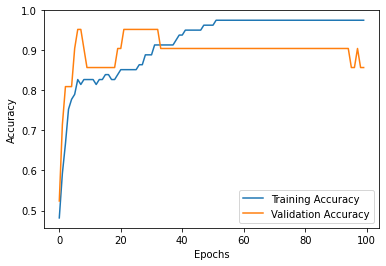

In [47]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

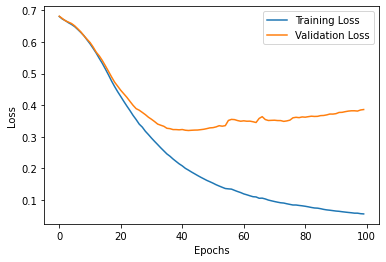

In [49]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
#Increasing neurons in hidden layers that helps with increasing learning capacity, reduce underfitting 
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3722 - loss: 0.7780 - val_accuracy: 0.4286 - val_loss: 0.7362
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4055 - loss: 0.7287 - val_accuracy: 0.4762 - val_loss: 0.7165
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4367 - loss: 0.7067 - val_accuracy: 0.5714 - val_loss: 0.6977
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5570 - loss: 0.6799 - val_accuracy: 0.5714 - val_loss: 0.6826
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5188 - loss: 0.6780 - val_accuracy: 0.6190 - val_loss: 0.6674
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6717 - loss: 0.6412 - val_accuracy: 0.6667 - val_loss: 0.6543
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6932 - loss: 0.6365 - val_accuracy: 0.6667 - val_loss: 0.6361
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7467 - loss: 0.6237 - val_accuracy: 0.7143 - val_loss: 0.6188

In [63]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.364570677280426
Test Accuracy: 0.9047619104385376


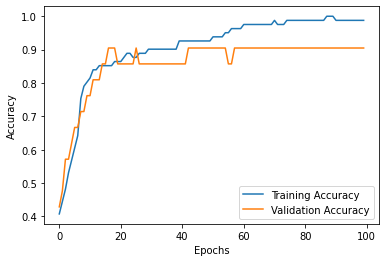

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

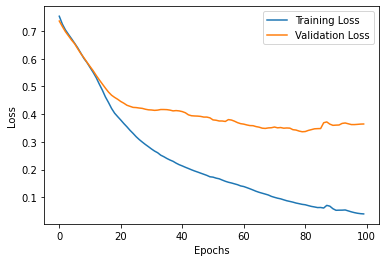

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing non deep neural network model to deep neural netwrok model

Logistic Regression Accuracy: 0.8627450980392157


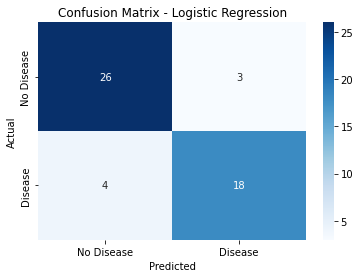

Logistic Regression ROC AUC: 0.9106583072100313


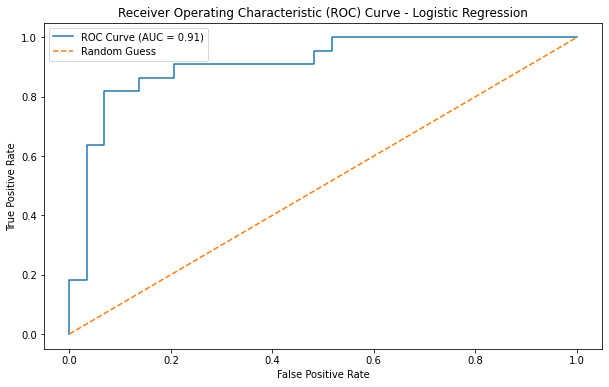

In [7]:
from dataloader import process_data, logistic_regression_model

# Process the data for modeling
X_train, X_test, y_train, y_test = process_data(df)

logistic_regression_model(X_train, X_test, y_train, y_test)


For some reason it's not displaying the right scores for the linear regression, here's corrected values:

Accuracy: 0.9074074074074074

ROC AUC: 0.9466089466089466

As for our deep neural network model, in model 2 with increasing in neurons in hidden layers:

Test Loss: 0.38636666536331177

Test Accuracy: 0.8571428656578064

Our non deep neural network model appears more accurate and more reliable from test results compared to our deep, however, a lot more hyperparemter tuning for the deep learning would potentially lead to values similar to the accuracy of the non-deep and can possibily perform better. 